# Project 2 : Linear Regression using Scikitlearn 

 **Meenakshi Nerolu**       $\hspace{18cm}$    **November 17, 2019**

# 1. Introduction

## Linear Regression 

Linear regression is one of the most commonly used algorithms in machine learning. It is used to predict values based on an    independent variable. Different regression models differ based on – the kind of relationship between dependent and independent variables, they are considering and the number of independent variables being used.
The linear regression model can be represented by the following equation

  $ Y= \theta_0 + \theta_1 x_1 +\theta_2 x_2 +... + \theta_n x_n, $ where
  
* Y : predicted value/target,   
* $\theta_0$: bias term,
* $\theta_1,...,\theta_n$: model parameters,
* $x_1, x_2, ..., x_n$: feature values.

Here 
* The dependent features are also called the dependent variables, outputs, or responses.

* The independent features are also called the independent variables, inputs, or predictors.

Regression problems usually have one continuous and unbounded dependent variable. The inputs, however, can be continuous, discrete, or even categorical data such as gender, nationality, brand, and so on.
Regression problems usually have one continuous and unbounded dependent variable. The inputs, however, can be continuous, discrete, or even categorical data such as gender, nationality, brand, and so on.
  
## Implementing Linear Regression in Python

To analyze linear regression model in python, we use Scikit-learn package. **Scikit-learn** is a free machine learning library for Python. It features various algorithms like support vector machine, random forests, and k-neighbours, and it also supports Python numerical and scientific libraries like *NumPy* and *SciPy*.

#### Linear Regression With scikit-learn

Basic steps when you’re implementing linear regression:

* Gathering and Exploring the data
* Data Preparation
* Splitting the data
* Initializing the Model and Parameters
* Training and Testing the model

Dataset *insurance.csv* is taken from www.kaggle.com

The aim of the project is to predict the health insurance cost by linear regression.

# 2. Prepare and wrangle data with Pandas and Numpy

## Importing all required libraries

In [1]:
# Python Libraries and Packages
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn as sk
import sklearn.metrics
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, KFold
#Allows us access to Scikit-learn linear regression model,
from sklearn import model_selection

Here 
> *pandas* is a software library written for the Python programming language for data manipulation and analysis.

> *numpy* is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices,     along with a large collection of high-level mathematical functions to operate on these arrays. 

> *scipy* is a free and open-source Python library used for scientific computing and technical computing. SciPy contains 
  modules for optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing,  
  ODE solvers and other tasks common in science and engineering.

> *matplotlib* is a plotting library for the Python programming language. 

> *seaborn* is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing  
  attractive and informative statistical graphics.

> *sklearn.linear_model* module which contains “methods intended for regression in which the target value is expected to be a 
  linear combination of the input variables”. 

> sklearn supports various built-in metrics, which can be found in the metrics section in the API. However, it is also possible   to define your own metric and use it to fit and evaluate your model.

### Reading csv file :

In [2]:
#data frame from csv file 
insurance = pd.read_csv("insurance.csv",index_col=None, na_values=['NA'],sep=',')

In [3]:
insurance.shape

(1338, 7)

We see that there are 1338 rows and 7 columns in our dataset. The columns contain variables such as,
* **age**
    - Age of primary beneficiary.
* **sex**
    - Insurance contractor gender, female, male.
* **bmi**
    - Body mass index (a measure of body fat in adults), providing an understanding of body, weights that are relatively high or low relative to height,  
      objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
* **children**  
    - Number of children covered by health insurance / Number of dependents.
* **smoker**
    - Smoking
* **region**
    - The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* **charges**
    - Individual medical costs billed by health insurance.

In [4]:
# Making new data frame with dropped NA values
insurance_new=insurance.dropna()
# dimension of the new dataframe
insurance_new.shape

(1338, 7)

In [5]:
insurance.charges =  insurance.charges.astype(int)
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges       int32
dtype: object

In [6]:
insurance.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884
1,18,male,33.77,1,no,southeast,1725
2,28,male,33.00,3,no,southeast,4449


**When implementing linear regression in a machine learning system, the variables must be continuous in nature, not categorical. In the following codes, I am going to convert some of the columns to continous variables.**

In [7]:
def map_smoking(column):
    mapped=[]
    
    for row in column:
        
        if row=="yes":
            mapped.append(1)
        else:
            mapped.append(0)
        
        
    return mapped
insurance["smoker_norm"]=map_smoking(insurance["smoker"])

##### Above code define a function to distinguish smokers and non-smokers.

##### Similarly the following code createes a new feature that distinguishes obese and non-obese individuals.

In [8]:
def map_obese(column):
    mapped=[]
    for row in column:
        if row>30:
            mapped.append(1)
        else:
            mapped.append(0)
    return mapped
insurance["obese"]=map_obese(insurance["bmi"])

In [9]:
#traversing through Gender column of dataFrame and writing values where condition matches. 
insurance.sex[insurance.sex == 'male'] = 0
insurance.sex[insurance.sex == 'female'] = 1
insurance_dummy = pd.get_dummies(insurance, columns=['region'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
print(insurance.head(3))

   age sex    bmi  children smoker     region  charges  smoker_norm  obese
0   19   1  27.90         0    yes  southwest    16884            1      0
1   18   0  33.77         1     no  southeast     1725            0      1
2   28   0  33.00         3     no  southeast     4449            0      1


In [11]:
print(insurance_dummy.head(3))

   age sex    bmi  children smoker  charges  smoker_norm  obese  \
0   19   1  27.90         0    yes    16884            1      0   
1   18   0  33.77         1     no     1725            0      1   
2   28   0  33.00         3     no     4449            0      1   

   region_northeast  region_northwest  region_southeast  region_southwest  
0                 0                 0                 0                 1  
1                 0                 0                 1                 0  
2                 0                 0                 1                 0  


# 3. EDA principles and the Matplotlib / Seaborn packages to visualize the data

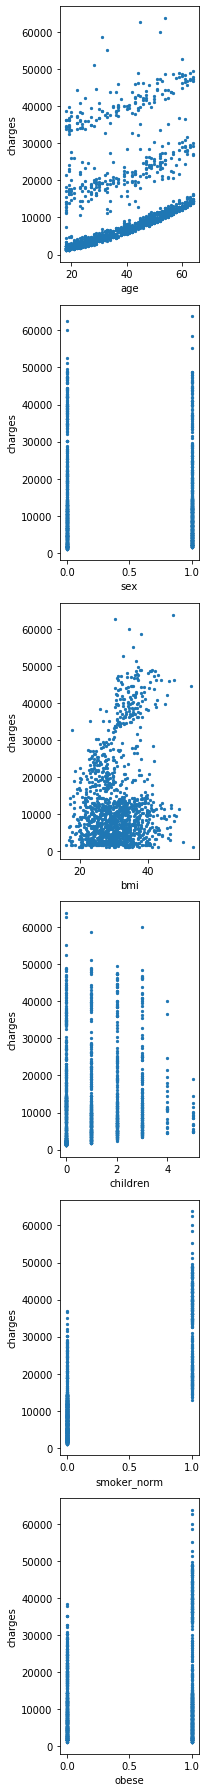

In [12]:
colnum=len(insurance.columns)-3
fig,ax=plt.subplots(colnum,1,figsize=(3,25))
ax[0].set_ylabel("charges")
p_vals={}
for ind,col in enumerate([i for i in insurance.columns if i not in ["smoker","region","charges"]]):
    
    ax[ind].scatter(insurance[col],insurance.charges,s=5)
    ax[ind].set_xlabel(col)
    ax[ind].set_ylabel("charges")  
plt.tight_layout()
plt.show()

# 4. scikit-learn linear regression to train, test and predict a numerical target variable

age :  0.29900868772784867
bmi :  0.1983415616200252
children :  0.06799912084967571
charges :  1.0
smoker_norm :  0.7872508167061558
obese :  0.19968402503416668


Text(0, 0.5, 'Absolute correlation')

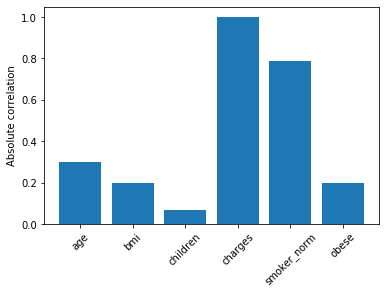

In [13]:
nonnum_cols=[col for col in insurance.select_dtypes(include=["object"])]
corr_vals=[]
collabel=[]
for col in [i for i in insurance.columns if i not in nonnum_cols]:
    
    p_val=sp.stats.pearsonr(insurance[col],insurance["charges"])
    corr_vals.append(np.abs(p_val[0]))
    print(col,": ",np.abs(p_val[0]))
    collabel.append(col)
plt.bar(range(1,len(corr_vals)+1),corr_vals)
plt.xticks(range(1,len(corr_vals)+1),collabel,rotation=45)
plt.ylabel("Absolute correlation")

**Smoking, age and obesity are the factors that contribute the most in the calculation of insurance costs. We will only use those features for our predictions.**

**I am going to define a new data frame *new_insurance* which contains age, charges, smoker_norms and obese.**

In [14]:
#insurance[insurance.columns]

#list of column names to keep
col_names=['charges','age','children', 'smoker_norm','obese']

#creating new filtered dataframe
new_insurance = insurance[col_names]

#print the new shape of the data,
print('The current number of rows and columns is:\n')
print(new_insurance.shape)

#checking summary statistics and info of new dataframe
print(new_insurance.info())

The current number of rows and columns is:

(1338, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
charges        1338 non-null int32
age            1338 non-null int64
children       1338 non-null int64
smoker_norm    1338 non-null int64
obese          1338 non-null int64
dtypes: int32(1), int64(4)
memory usage: 47.1 KB
None


We will make our predictions using Linear Regression, for which we will model the relationship between the three variables and insurance costs by fitting a linear equation to observed data.
We will assume that the model for multiple linear regression, given $n=3$ observations, is :
$y = ax_1 + bx_2 + cx_3 + i$
where:
* $y$ is the health insurance cost
* $a$ is the age penalty
* $b$ is the obesity penalty
* $c$ is the penalty to smokers
* $i$ is the intercept of the equation

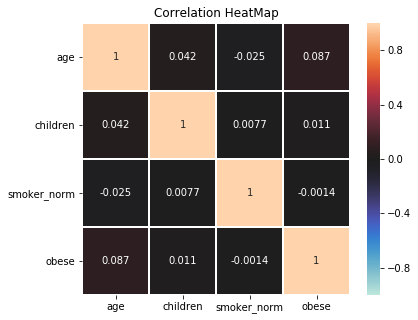

In [15]:
#filtering the dataframe to include features and another with target
features = new_insurance.loc[:,new_insurance.columns != 'charges']
targets = new_insurance.loc[:,new_insurance.columns == 'charges']

#creating pairwise correlation of columns using Pearson's R,
corr = features.corr(method='pearson') 

#plotting the correlation coefficients on a seasborn heatmap matrix
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(corr, annot=True, xticklabels=corr.columns, 
            yticklabels=corr.columns, ax=ax, linewidths=.5, 
            vmin = -1, vmax=1, center=0)

plt.title('Correlation HeatMap')
plt.show()

There are not many Multicollinearity issues in the variables chosen (the value of 1’s on the diagonal axis are self-correlation). There is a case to remove this variable, but we will keep it in the model for now.

### Splitting the data

We should be preparing the data for our regression model by splitting our data into two distinct sets of data —  one for Training and another for Testing. We will be using the function *train_test_split* from Pythons Scikit-learn library to split our data randomly. We usually split the data around 20%-80% between testing and training stages.

In [16]:
#importing our function for splitting the data and an additional cross validation function,
from sklearn.model_selection import train_test_split, cross_val_score

#splitting our dataset randomly with the test data containing 10% of the data,
X_train, X_test, y_train, y_test = train_test_split(features,targets, 
                                                    test_size=0.2, random_state=9)

#view number of training and testing data
print('Our training prediction variable contains :',len(y_train) ,'rows')
print('Our training independent variable contains :',len(X_train) ,'rows')
print('Our testing prediction variable contains :',len(y_test) ,'rows')
print('Our testing independent variable contains :',len(X_test) ,'rows')

Our training prediction variable contains : 1070 rows
Our training independent variable contains : 1070 rows
Our testing prediction variable contains : 268 rows
Our testing independent variable contains : 268 rows


In [17]:
print ('Shape of X:', features.shape)
print ('Shape of y:', targets.shape)
print ('Shape of X_train:', X_train.shape)
print ('Shape of y_train:', y_train.shape)
print ('Shape of X_test:', X_test.shape)
print ('Shape of y_test:', y_test.shape)

Shape of X: (1338, 4)
Shape of y: (1338, 1)
Shape of X_train: (1070, 4)
Shape of y_train: (1070, 1)
Shape of X_test: (268, 4)
Shape of y_test: (268, 1)


The line *test_size=0.2* suggests that the test data should be 20% of the dataset and the rest should be train data. With the outputs of the * shape() functions, you can see that we have 268 rows in the test data and 1070 in the training data.

### Interpret the meaning of the score :

Our chosen model ‘Multiple Linear Regression’ does not require any model parameter input. We can initialize it using Scikit-learn with Python. We will fit our training data to the model, which would run the regression algorithm towards the data and provides us with the coefficient values for each independent variable plus an intercept value.

In [18]:
reg_model = LinearRegression()
#fitting the training data to the model,
reg_model.fit(X_train, y_train)

#outputs the coefficients
print('Intercept :', reg_model.intercept_[0], '\n')
print(pd.DataFrame({'features':X_train.columns,'coeficients':reg_model.coef_[0]}))

Intercept : -4330.261135484074 

      features   coeficients
0          age    258.224833
1     children    447.999038
2  smoker_norm  23606.993591
3        obese   4096.675190


From the output above we can approximate our prediction function as such,

$charges = -4330.261 + (258.225 * age) + (447.999 * children) + (23606.994 * smoker\_norm) + (4096.675* obese )$

We compute a ‘score’ for the model (there are multiple metric for evaluating our model) using Mean Squared Error (MSE)

### Model Evaluation

There are three primary metrics used to evaluate linear models. These are: Mean absolute error (MAE), Mean squared error (MSE), or Root mean squared error (RMSE).

#### MSE using scikit – learn:

In [19]:
#for calculating MSE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

y_pred_test = reg_model.predict(X_test)
y_pred_train = reg_model.predict(X_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train =mean_squared_error(y_train, y_pred_train)

print("Mean Squared Error of Testing Set: ", mse_test)
print("Mean Squared Error of Training Set: ", mse_train)

Mean Squared Error of Testing Set:  31244835.750654668
Mean Squared Error of Training Set:  37305700.18805298


#### MSE using numpy:

In [20]:
# Mean Squared Error 
y_pred = reg_model.predict(X_test)
MSE = np.square(np.subtract(y_test,y_pred)).mean() 
print("MSE :", MSE)

MSE : charges    3.124484e+07
dtype: float64


In [21]:
# calculate MAE, MSE, RMSE
from sklearn import metrics
print("MAE :", metrics.mean_absolute_error(y_test, y_pred))
print("MSE :", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE : 3912.3610980742374
MSE : 31244835.750654668
RMSE: 5589.70802016122


# 5. Histogram of the residuals and checking if they have a Gaussian distribution 

Viewing a plot of the residual errors is an important step in evaluating regression models. This is a graph which plots each positive and negative residual error which are the outcome of actual values minus the predicted values.

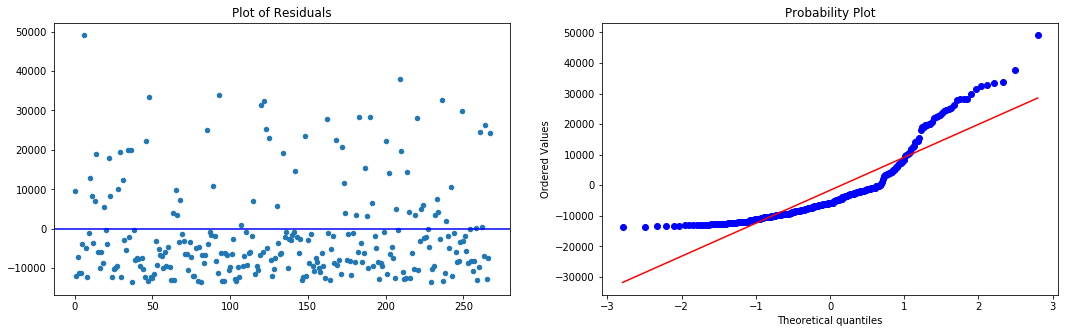

In [22]:
import scipy.stats as stats
#calculate the residuals
#y_pred = pd.DataFrame(y_pred)
y_pred = reg_model.predict(X_test)
y_test = y_test.reset_index(drop=True)
residuals = y_test.charges - y_pred[0]

#plotting Residual and Probabililty graph
plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
plt.axhline(0, color="blue")
plt.title('Plot of Residuals')
plt.scatter(residuals.index,residuals, s=20)
plt.subplot(1,2,2)
plt.title('Probability Plot')
stats.probplot(residuals, dist='norm',plot=plt)
plt.show()

The Plot of Residuals reveal that our error values are distributed across the expected mean of zero. However there are a couple of distinct outliers present. This indicates that the residuals are not exactly ‘normal’.

The probability plot also indicates that the residuals are not exactly ‘normal’.  The good fit indicates that normality is a reasonable approximation. The slight downward shape of the curve implies a right-skewed distribution and the outliers are very evident.

It could be that the outliers are affecting our model’s accuracy and dealing with them could bring us better results.

([array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0.

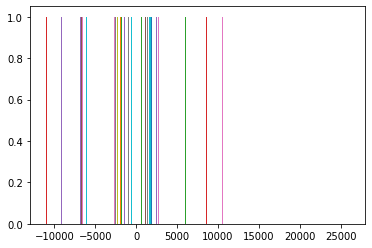

In [23]:
plt.hist(y_test - y_pred)

# 6. scatterplot of predicted values and residuals to check assumption of homoscedasticity

Sample predictions are:
 [14743.45434165  6480.2597003   7479.63053483  3089.80838161
  3416.48384078]


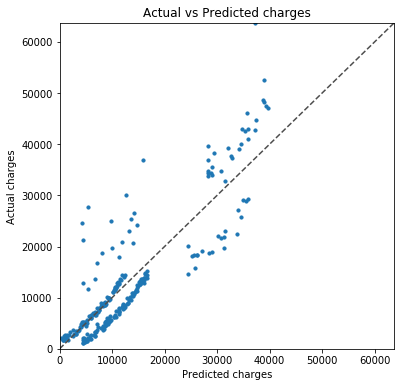

In [24]:
#prediction values using testing set
y_pred = reg_model.predict(X_test)

#printing sample of predictions
print('Sample predictions are:\n', y_pred[:5].flatten())

y_pred_a = pd.DataFrame(y_pred)
y_test_a = y_test.reset_index(drop=True, inplace=False)
pred_act_df = pd.concat([y_test_a,y_pred_a], axis=1).sort_values(1,axis=1).reset_index(drop=True)

#output samples of our predicted values
plt.figure(figsize=(6, 6))
maxlimit = pred_act_df['charges'].max()
plt.xlim(-1, maxlimit)
plt.ylim(-1, maxlimit)
plt.scatter(pred_act_df[0], pred_act_df['charges'], s=10)
plt.xlabel('Predicted charges')
plt.ylabel('Actual charges')
plt.plot([-1,maxlimit], [-1,maxlimit], ls="--", c=".3")
plt.title('Actual vs Predicted charges')
plt.show()

In the graph above, the closer the points are to the diagonal line the better the accuracy of our predictions (it would mean our predicted values matches the actual values).

A residual (error) term is calculated as $e_i=y_i−y^i$, the difference between an actual and a predicted value of $y$.

Text(0.5, 1.0, 'residual vs Predicted charges')

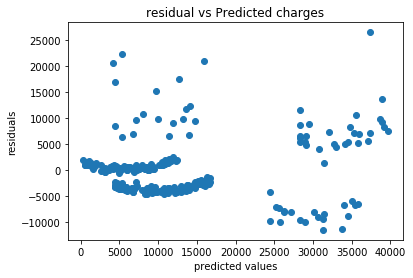

In [25]:
residuals = y_test - y_pred
plt.scatter(y_pred,residuals)
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.title('residual vs Predicted charges')

From the scatterplot, we can see that the data violates the assumption of homoscedasticity, i.e. heteroscedasticity is present in the data meaing, the circumstance in which the variability of a variable is unequal across the range of values of a second variable that predicts it. In this case we can transform the variables to improve the model, or use a robust regression method that accounts for the heteroscedasticity.

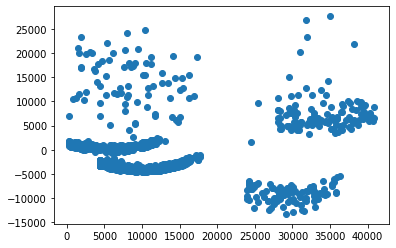

In [26]:
plt.scatter(reg_model.predict(X_train), y_train - reg_model.predict(X_train))

# 7. Interpretation of the coefficients of the linear regression

A linear regression model with four predictor variables can be expressed with the following equation:

$ y= \theta_0 + \theta_1 x_1 +\theta_2 x_2 + \theta_3 x_3 + \theta_4 x_4 + \epsilon$

The variables in the model are :

* y : the response variable (charges)
* $x_1$ : the first predictor variable (age)
* $x_2$ : the second predictor variable (children) 
* $x_3$ : the third predictor variable (smoker_norm)
* $x_4$ : the fourth predictor variable (obese) and
* $\epsilon$ : the residual error, which is an unmeasured variable.

The parameters in the model are:

* $\theta_0$ :  the Y-intercept,
* $\theta_1,...,\theta_4$ : first, second, third and fourth regression coefficients respectively.

In the above example, age, children and charges are continuous variables. smoker_norm and obese are categorical variables.

This project is about the model of the health insurance cost (y) based on age ($x_1$), children ($x_2$), smoker_norm ($x_3$) and obese ($x_4$).

Here $smoker\_norm = 1$ if the person is smoking else it is 0 and if $bmi > 30 $ then $obese =1$  else it is 0.
With these the regression equation was estimated as follows : 

$charges = -4330.261 + (258.225 * age) + (447.999 * children) + (23606.994 * smoker\_norm) + (4096.675* obese )$

### Interpreting the Intercept

$\theta_0$, the y-intercept, can be interpreted as the value we would predict for y, if $x_1=x_2=x_3=x_4=0$. In our case, it is easy to see that $x_2$ (Number of children covered by health insurance), $x_3$ (smoker_norm) and $x_4$ (obese) can become 0 but $x_1$ (age) can not become 0. Therefore, our intercept has no real interpretation.

### Interpreting Coefficients of Continuous Predictor Variables

Since $x_1$ is continuous variables, $\theta_1$ represents the difference in the predicted value of $y$ for each one-unit difference in $x_1$, if $x_2,x_3, x_4$ remain constant.

This means that if $x_1$ differed by one unit (and others did not differ) $y$ will differ by $\theta_1$ units, on average. Similarly for $x_2$.

### Interpreting Coefficients of Categorical Predictor Variables

Similarly, $\theta_3$ is interpreted as the difference in the predicted value in $y$ for each one-unit difference in $x_3$ if other x's remain constant. However, since $x_3$ is a categorical variable coded as $0$ or $1$, a one unit difference represents switching from one category to the other.

$\theta_3$ is then the average difference in $y$ between the category for which $x_3 = 0$ (the reference group) and the category for which $x_3=1$ (the comparison group). The same theory works for $x_4.$

In [27]:
def cost(age,children,smoker_norm,obese):
  return -4330.261 + (258.225 * age) + (447.999 * children) + (23606.994 * smoker_norm) + (4096.675* obese )
cost(30,2,0,0)

4312.487000000001

Linear regression is simple, with statsmodels. We are able to use R style regression formula.

In [28]:
import statsmodels.formula.api as smf
reg = smf.ols('charges ~ age + smoker_norm + obese', data=new_insurance).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     1345.
Date:                Sun, 17 Nov 2019   Prob (F-statistic):               0.00
Time:                        19:21:55   Log-Likelihood:                -13546.
No. Observations:                1338   AIC:                         2.710e+04
Df Residuals:                    1334   BIC:                         2.712e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4108.1030    516.913     -7.947      0.000   -5122.154   -3094.052
age           261.8244     11.810     22.170      0.000     238.656     284.992
smoker_norm  2.385e+04    409.478     58.248      0.000     2.3e+04    2.47e+04
obese        4229.1432    332.112     12.734      0.000    3577.624    4880.662
==============================================================================
Omnibus:                      327.734   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              823.304
Skew:                           1.298   Prob(JB):                    1.67e-179
Kurtosis:                       5.833   Cond. No.                         136.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Note: p-value below 0.5 means that the cariavle is significance. Therefore, the coefficient is most probably different from 0.**

# Summary

Multiple regression analysis was used to test if age, number of children, smoking norm and obese significantly predicted the cost of insurance premiums. The predicted insurance premium charge is equal to:
$charges = -4330.261 + (258.225 * age) + (447.999 * children) + (23606.994 * smoker\_norm) + (4096.675* obese )$. 

All of the independent variables used in the model were significant predictors of insurance premium charge.